In [399]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

In [400]:
dx=3.00e-3
L=30e-2
dL=10.0e-2
q=2000
k=1
h=10
Cv=1000
rho=2000


x=np.arange(0,L+dx,dx)
Sx_mod=np.zeros(len(x))
Sx_mod[x>L-(dL+1*dx)]=-q  # vérifier le + dx

Ta=-10
Ti=20
Tx0=np.ones(len(x))*Ta

c1=1
c2=-h/k
c3=h*Ta/k

# c1=0
# c2=1
# c3=-Ta


# d1=0
# d2=1
# d3=-Ti

d1=1
d2=h/k
d3=-h*Ti/k




In [405]:
A=np.diag(-2*np.ones(len(x)),k=0)+np.diag(1*np.ones(len(x)-1),k=1)+np.diag(1*np.ones(len(x)-1),k=-1)
A[0,0]=2*c2*dx-3*c1
A[0,1]=4*c1
A[0,2]=c1
A[-1,-3]=d1
A[-1,-2]=-4*d1
A[-1,-1]=2*d2*dx+3*d1

b=Sx_mod*dx**2
b[0]=-2*c3/dx
b[-1]=-2*d3/dx

b=np.reshape(b,[len(x),1])
Asp = csc_matrix(A, dtype=float)
bsp = csc_matrix(b, dtype=float)


1662281.7903166562

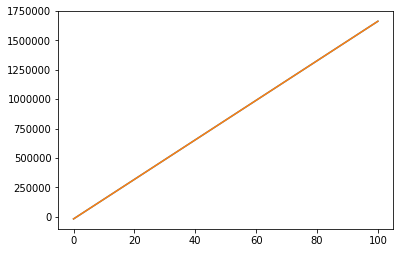

In [406]:
T=np.linalg.solve(A,b)

T_eq = spsolve(Asp, bsp)
plt.plot(T)
plt.plot(T_eq)
np.max(T_eq)

In [407]:
## Valeur avec T_eq(dx=3mm)
Val1=29.07281715039648

Val2=28.930172175865586  #dx=1.5mm
#Erreur
Val2-Val1

-0.14264497453089575

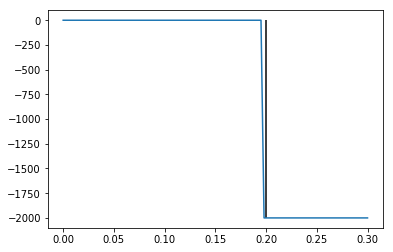

In [408]:
plt.plot(x,Sx_mod)
plt.vlines(L-dL, 0,-2000)

## Version dépendante du temps 

In [409]:
dt=dx**2*Cv*rho/k
alpha=Cv*rho/k
Xi=0.5

t_space=np.arange(0,4e3+dt,dt)

M=np.eye(len(x))
M[0,0]=0
M[-1,-1]=0


In [411]:
T_max=[]
Tn=Tx0
for t in t_space:
    bn=Sx_mod*dx**2
    bn[0]=-2*c3*dx
    bn[-1]=-2*d3*dx
    bnp1=bn
    b_new=np.dot((M+dt/alpha/(dx**2)*(1-Xi)*A),Tn)-(dt/alpha/(dx**2)*(Xi*bnp1+(1-Xi)*bn))
    A_new=M-dt/alpha/(dx**2)*Xi*A
    
    b_new=np.reshape(b_new,[len(x),1])
    A_new_sp = csc_matrix(A_new, dtype=float)
    b_new_sp = csc_matrix(b_new, dtype=float)
    Tn=spsolve(A_new_sp, b_new_sp)
    T_max.append(np.max(Tn))

    
    
    
    
    
    
    

Text(0, 0.5, 'T_eq_max(t)')

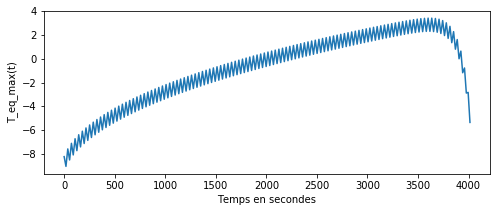

In [412]:
plt.figure(figsize=(8,3))
plt.plot(t_space, T_max)
plt.xlabel("Temps en secondes")
plt.ylabel("T_eq_max(t)")
